Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
titanic_df = pd.read_csv('/content/train.csv')

print("DataFrame Info:")
titanic_df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
print("First 10 rows of the dataset:")
display(titanic_df.head(10))


First 10 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

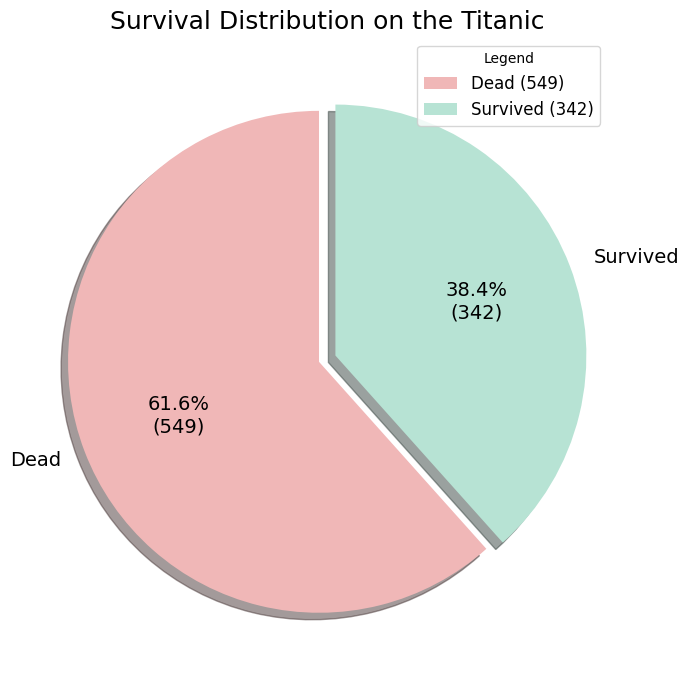

In [4]:
survival_counts = titanic_df['Survived'].value_counts()
labels = ['Dead', 'Survived']
colors = ['#f0b7b7', '#b7e3d4']
explode = (0.05, 0.02)

def format_percentage_and_count(percentage, all_vals):
    """
    Format the percentage and corresponding absolute value for a pie chart label.

    Parameters:
        pct (float): The percentage value of the current pie slice.
        all_vals (iterable): The collection of all values used to compute absolute counts.

    Returns:
        str: A formatted string containing the percentage and absolute value.
    """
    absolute_value = int(round(percentage / 100. * sum(all_vals)))
    return f'{percentage:.1f}%\n({absolute_value})'

plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(
    survival_counts,
    labels=labels,
    autopct=lambda pct: format_percentage_and_count(pct, survival_counts),
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14}
)

plt.title('Survival Distribution on the Titanic', fontsize=18)
plt.axis('equal')

plt.legend(patches, [f'{label} ({count})' for label, count in zip(labels, survival_counts)],
           loc='upper right',
           fontsize=12,
           title='Legend')

plt.tight_layout()
plt.show()


На цій діаграмі показано співвідношення загиблих та виживших пасажирів на Титаніку. Загиблих пасажирів більшість - 61.6% (549 осіб), а виживших - лише 38.4% (342 особи)

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


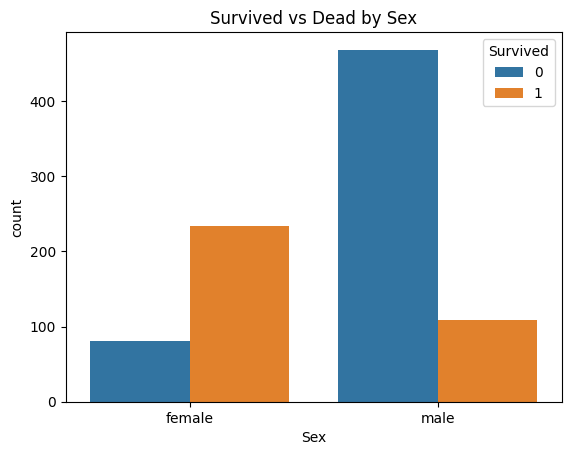

<Figure size 1000x500 with 0 Axes>

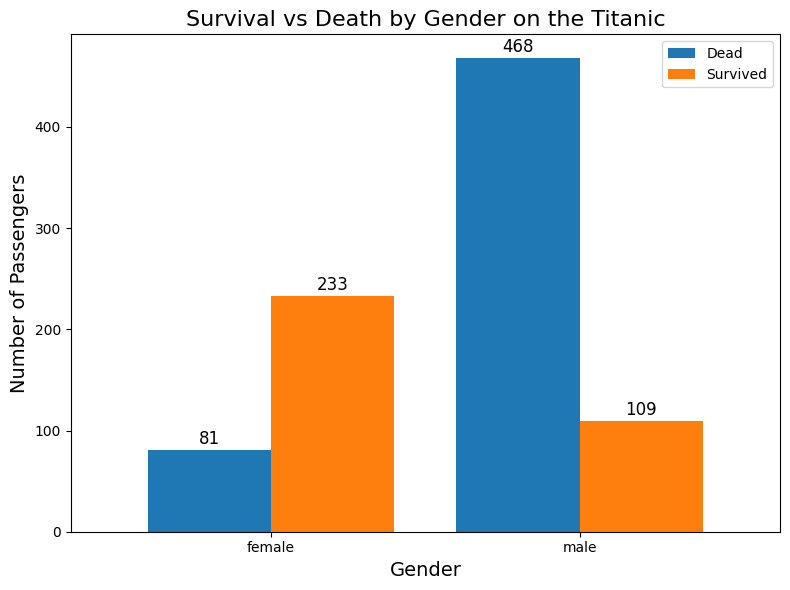

In [14]:
gender_survival_counts = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_survival_pivot = gender_survival_counts.pivot(index='Sex', columns='Survived', values='size')
gender_survival_pivot.columns = ['Dead', 'Survived']

plt.figure(figsize=(10, 5))
bar_plot = gender_survival_pivot.plot(
    kind='bar',
    stacked=False,
    color=['#1f77b4', '#ff7f0e'],
    width=0.8,
    figsize=(8, 6)
)

plt.title('Survival vs Death by Gender on the Titanic', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks(rotation=0)

for bar in bar_plot.patches:
    bar_plot.annotate(
        f'{bar.get_height()}',
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha='center', va='center',
        fontsize=12, color='black',
        xytext=(0, 8), textcoords='offset points'
    )

plt.tight_layout()
plt.show()


На цій візуалізації зображено стовпчикову діаграму про кількість виживших та загиблих людей на Титаніку залежно від статі. Горизонтальна вісь відповідає за стать, а вертикальна - за кількість людей. Синім кольором позначено кількість загиблих, а помаранченим - виживших.

1) Можна зробити висновок, що чоловіків на кораблі було значно більше.

2) Більшість жінок залишились живими після трагедії, тобто їм надавали перевагу під час порятунку пасажирів.

3) А щодо чоловіків, то вони навпаки переважно загинули.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

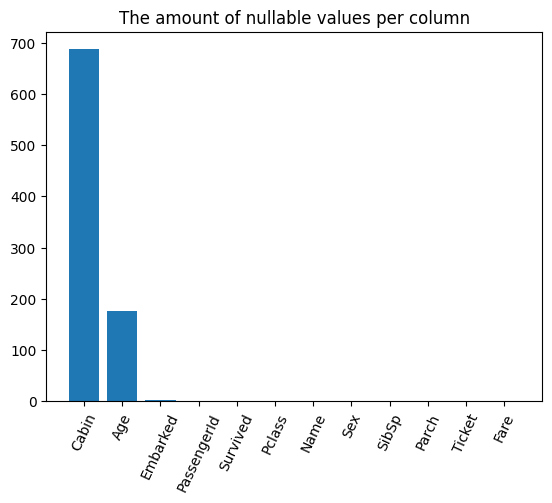

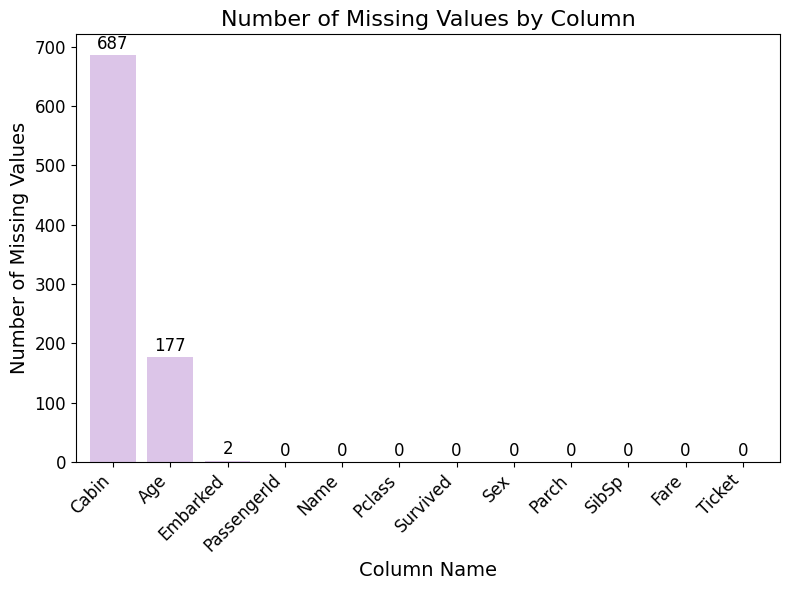

In [15]:
missing_values_per_column = titanic_df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
ax = missing_values_per_column.plot(
    kind='bar',
    width=0.8,
    color='#dcc5e8'
)

plt.title('Number of Missing Values by Column', fontsize=16)
plt.xlabel('Column Name', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)

for bar in ax.patches:
    ax.annotate(
        f'{bar.get_height()}',
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

На цій візуалізації зображена стовпчикова діаграма про кількість пропущених значень для кожної змінної (стовпцю) в датасеті Титаніка.

*Висновки:*

Найбільшу кількість пропущених значень має Cabin - 687 та age - 177. Також embarked - 2. Всі інші змінні не мають пропущених значень, що робить їх повними для аналізу.

---------------------------------------------

На мій погляд, краще відфільтрувати значення колонок, щоб показувались лише ті, де пропущені значення наявні (тобто їх кількість більше 0). Бо в початковій версії більша частина діаграми не несе корисної інформації, оскільки більшість змінних заповнені й не мають пустих значень. Отже, додамо фільтрацію:

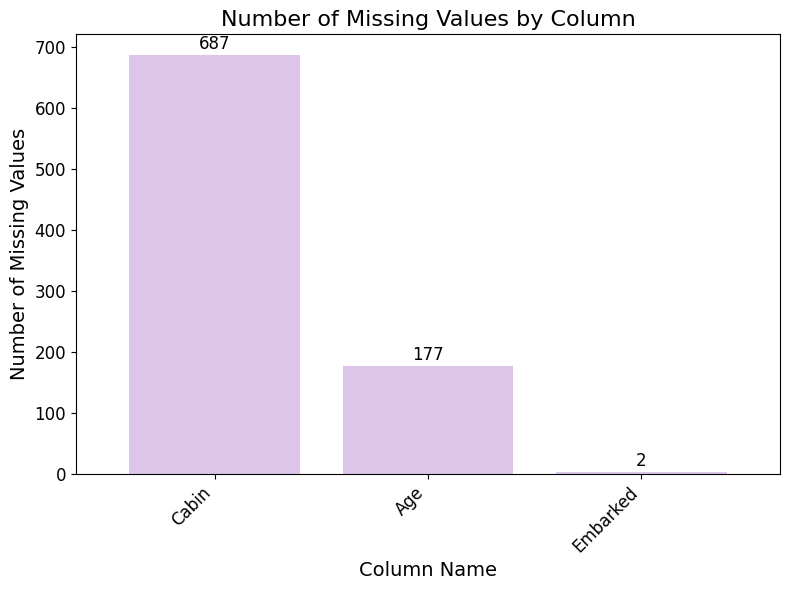

In [16]:
missing_values_per_column = titanic_df.isnull().sum()
missing_values_nonzero = missing_values_per_column[missing_values_per_column > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = missing_values_nonzero.plot(
    kind='bar',
    width=0.8,
    color='#dcc5e8'
)

plt.title('Number of Missing Values by Column', fontsize=16)
plt.xlabel('Column Name', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)

for bar in ax.patches:
    ax.annotate(
        f'{int(bar.get_height())}',
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

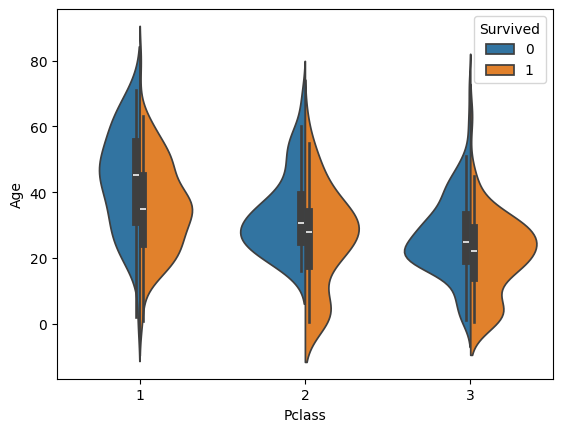

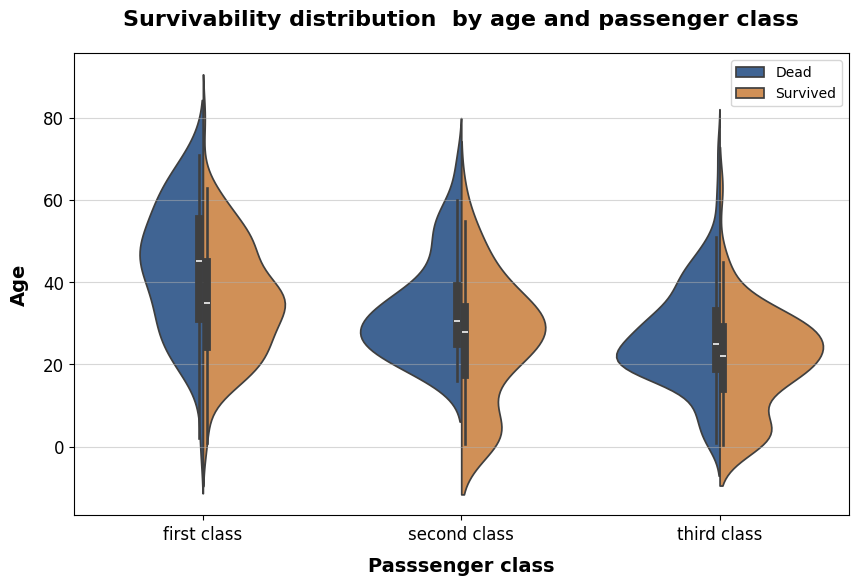

In [19]:
plt.figure(figsize=(10, 6))
survival_color_palette = {0: "#3262a1", 1: "#e48f43"}
ax = sns.violinplot(
    x='Pclass',
    y='Age',
    hue='Survived',
    data=titanic_df,
    split=True,
    palette=survival_color_palette
)
plt.title('Survivability distribution  by age and passenger class',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Passsenger class', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Age', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks([0, 1, 2], ['first class', 'second class', 'third class'], fontsize=12)
plt.yticks(fontsize=12)

legend_handles, legend_labels = ax.get_legend_handles_labels()
custom_labels = ['Dead', 'Survived']
plt.legend(handles=legend_handles, labels=custom_labels)
plt.grid(axis='y', alpha=0.5)
plt.show()

Цей графік (**violin plot**) дає змогу оцінити розподіл загиблих та врятованих пасажирів за віком та класом, яким вони їхали. Горизонтальна вісь показує клас кабіни, а вертикальна - вік пасажирів. Синім кольором позначено кількість загиблих, а помаранченим - виживших.

*Вікова структура за класами:*

*  Пасажири першого класу мають вищий середній вік порівняно з другим і третім класами.
*  У третьому класі спостерігається найбільша концентрація молодих пасажирів (близько 20-30 років).


*Шанси на виживання:*

*  У першому класі помаранчева частина (ті, хто вижив) досить широка, що вказує на вищий відсоток виживання серед пасажирів цього класу.
*  У другому та третьому класах синя частина (загиблі) значно ширша, ніж помаранчева, що свідчить про нижчі шанси на виживання.
*  У всіх класах форма розподілу виживших зміщена до молодшого віку, що вказує на те, що дітей намагалися врятувати в пріоритеті.


*Особливості виживших людей залежно від віку:*

*  У першому класі кількість виживших має помітне розширення в діапазоні 30-50 років.
*  У другому та третьому класах найбільше виживших молодшого віку (20-35 років).
*  У всіх класах поступово зменшується частка виживших зі збільшенням віку.



6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


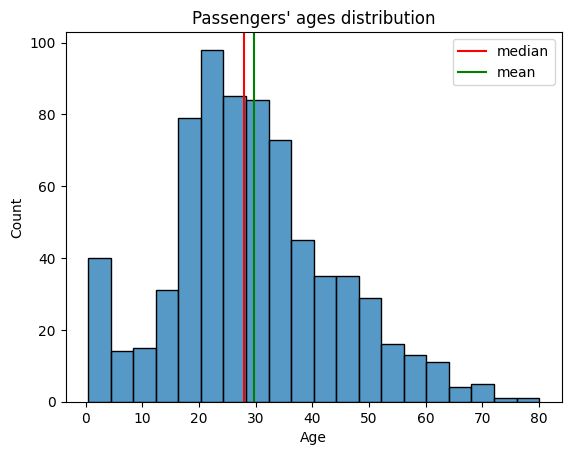

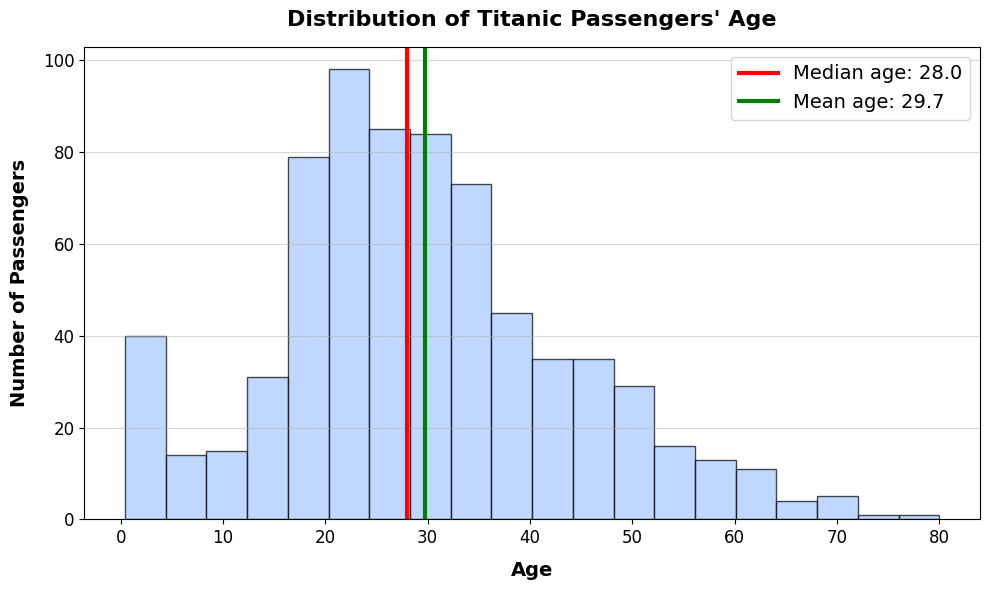

In [20]:
median_passenger_age = titanic_df['Age'].median()
mean_passenger_age = titanic_df['Age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(
    titanic_df['Age'].dropna(),
    bins=20,
    edgecolor='black',
    alpha=0.7,
    color='#a6c8ff'
)
plt.axvline(
    median_passenger_age,
    color='red',
    linewidth=3,
    label=f'Median age: {median_passenger_age:.1f}'
)
plt.axvline(
    mean_passenger_age,
    color='green',
    linewidth=3,
    label=f'Mean age: {mean_passenger_age:.1f}'
)

plt.title("Distribution of Titanic Passengers' Age", fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Age', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Number of Passengers', fontsize=14, fontweight='bold', labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

На цій візуалізації зображена гістограма розподілу віку пасажирів Титаніка. Горизонтальна вісь відповідає за вік пасажирів, а вертикальна - за кількість пасажирів у кожному віковому діапазоні. Стовпчики голубого кольору показують, скільки пасажирів потрапило до кожного конкретного вікового інтервалу. Червона лінія - медіана віку пасажирів. Зелена лінія - середній вік пасажирів.

**Висновки:**

Найбільша кількість пасажирів (пік гістограми) припадає на віковий діапазон приблизно від 20 до 30 років, але на борту були представники всіх вікових груп.

Основна маса пасажирів - це молоді люди. Також значна кількість дітей та підлітків.


7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

**Питання 1:** Як соціально-економічний статус пасажира (визначений класом каюти - Pclass) впливав на його шанси на виживання? Чи можна вважати, що пасажири вищого класу мали виживали більше?

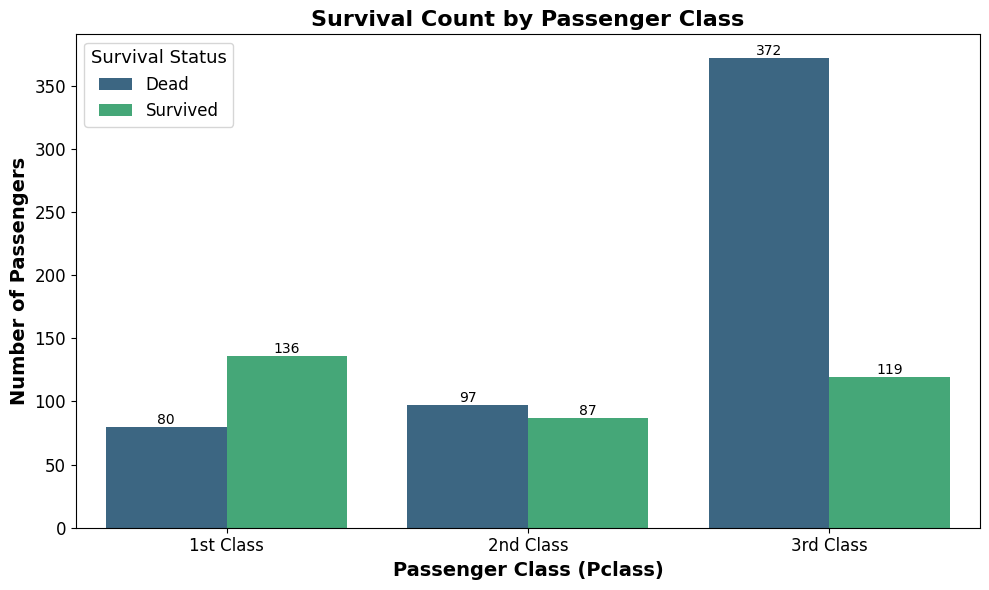

Survival Rates by Class (%):
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette='viridis')

plt.title('Survival Count by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class (Pclass)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=14, fontweight='bold')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Dead', 'Survived'], title='Survival Status', title_fontsize='13', fontsize='12')

for container in ax.containers:
   ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

survival_rates = titanic_df.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rates by Class (%):\n", survival_rates)

На стовпчиковій діаграмі показано кількість пасажирів, які вижили (стовпчики зеленого кольору) та загинули (стовпчики синього кольору), у розрізі трьох класів кают (1-й, 2-й, 3-й).

**1-й клас:** Кількість пасажирів, що вижили, помітно перевищує кількість загиблих. Розрахунок показує, що вижило близько 63% пасажирів 1-го класу.

**2-й клас:** Кількість тих, хто вижив, та тих, хто загинув, є майже однаковою, але загиблих трохи більше. Вижило приблизно 47% пасажирів 2-го класу.

**3-й клас:** Кількість загиблих значно перевищує кількість тих, хто вижив. Це найнижчий показник виживання - лише ~24%.

*Відповідь на бізнес-питання:* Так, соціально-економічний статус, представлений класом каюти, мав вплив на шанси виживання. Пасажири 1-го класу мали значно вищі шанси на виживання порівняно з пасажирами 2-го, і особливо 3-го класу. Це може вказувати на кращий доступ до рятувальних шлюпок, розташування кают ближче до палуби або інші привілеї, пов'язані з класом каюти.

**Питання 2:** Як вік пасажирів корелював із класом каюти? Чи відрізнявся типовий вік пасажирів у 1-му, 2-му та 3-му класах?

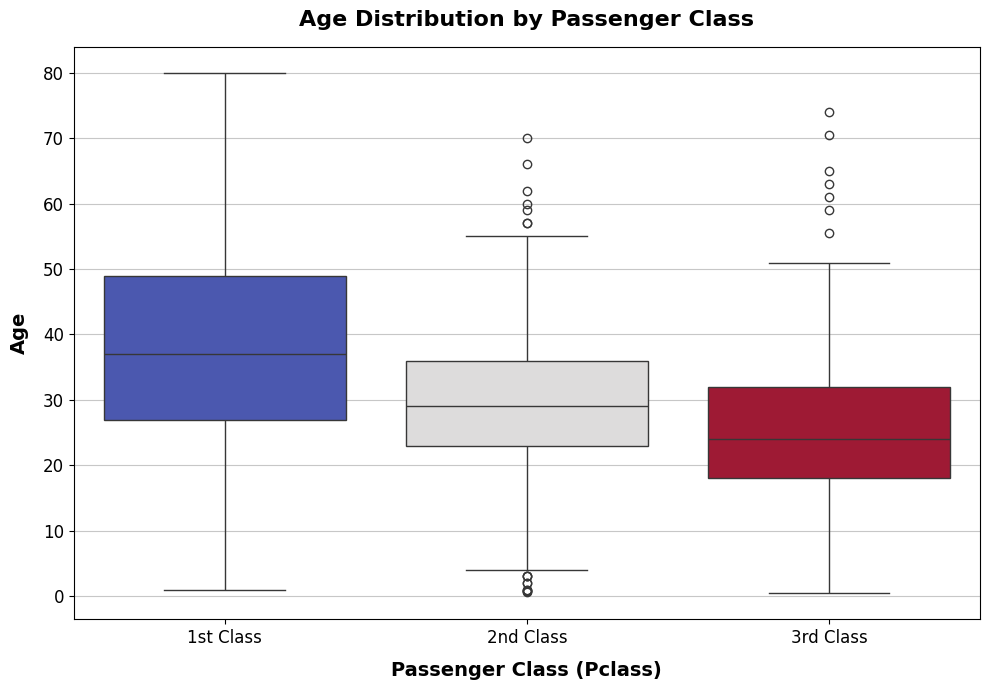

Median Ages by Class:
 Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [22]:
plt.figure(figsize=(10, 7))

sns.boxplot(
    data=titanic_df,
    x='Pclass',
    y='Age',
    hue='Pclass',
    palette='coolwarm',
    dodge=False,
    legend=False
)

plt.title('Age Distribution by Passenger Class', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Passenger Class (Pclass)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Age', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

median_ages = titanic_df.groupby('Pclass')['Age'].median()
print("Median Ages by Class:\n", median_ages)


На діаграмі box plot показано розподіл віку пасажирів для кожного класу кают.

**1-й клас:** Медіанний вік є найвищим (близько 37 років). Розподіл віку також найширший, з великою кількістю пасажирів середнього та старшого віку.

**2-й клас:** Медіанний вік нижчий, ніж у 1-му класі (близько 29 років). Розмах віку також менший.

**3-й клас:** Медіанний вік найнижчий (близько 24 років). Тут також спостерігається найбільша кількість дітей та молодих людей.

*Відповідь на бізнес-питання:* Так, існувала чітка кореляція між віком пасажирів та класом каюти. Пасажири 1-го класу були в середньому значно старшими за пасажирів 2-го і 3-го класу. У 3-му класі подорожувало найбільше молоді та дітей. 1-й клас частіше приваблює старшу, більш платоспроможну аудиторію, тоді як бюджетний сегмент (3-й клас) може бути популярнішим серед молоді та сімей з дітьми.

**Питання 3:** Чи мали жінки перевагу у виживанні у кожному класі пасажирів?

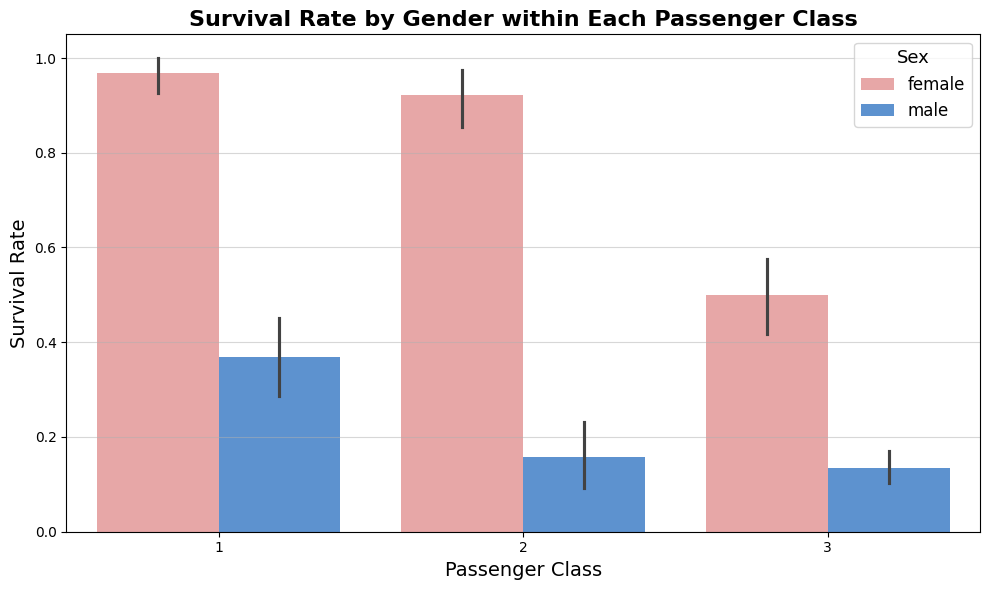

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=titanic_df,
    palette={'male': '#4a90e2', 'female': '#f29c9c'}
)
plt.title('Survival Rate by Gender within Each Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.legend(title='Sex', fontsize=12, title_fontsize=13)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


Ця стовпчикова діаграма barplot показує рівень виживання пасажирів Титаніка, розділених одночасно за двома критеріями:

*  Клас пасажира (Pclass): Відображено на горизонтальній осі.
*  Стать (Sex): рожевий колір стовпчиків - жінки, синій - чоловіки.

Висота кожного стовпчика на вертикальній осі показує частку пасажирів відповідної статі та класу, які вижили (значення від 0.0 до 1.0, де 1.0 означає 100% виживання). Чорні вертикальні лінії на вершинах стовпчиків представляють інтервали для оцінки рівня виживання. Вони дають уявлення про статистичну невизначеність: чим коротший "вус", тим точніша оцінка середнього рівня виживання для цієї групи.

*Відповідь на бізнес-питання:* Так, жінки мали значно вищий рівень виживання, ніж чоловіки, в кожному класі пасажирів.

У першому класі вижили майже всі жінки(~97%).

У другому класі вижили бульше 90% жінок (~92%).

Рівень виживання жінок 3 класу суттєво нижчий, ніж в інших класах, становить ~50%.

Жінки 1-го та 2-го класу мали найкращі шанси на порятунок, тоді як чоловіки 3-го класу - найгірші.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

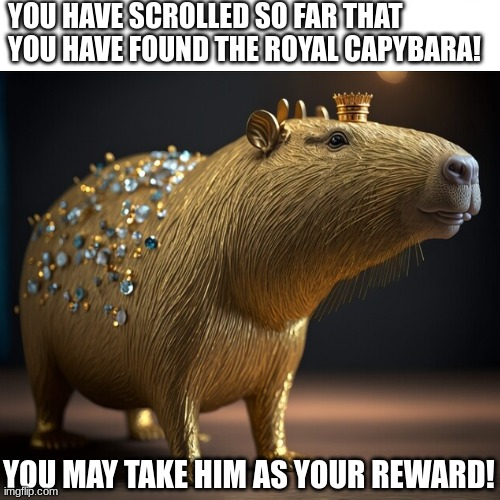